In [1]:
import torch
import pytorch_mask_rcnn as pmr


use_cuda = True
dataset = "coco"
ckpt_path = "maskrcnn_coco-200.pth"
data_dir = "../Vegas_coco_random_splits/"

device = torch.device("cuda" if torch.cuda.is_available() and use_cuda else "cpu")
if device.type == "cuda":
    pmr.get_gpu_prop(show=True)
print("\ndevice: {}".format(device))

ds = pmr.datasets(dataset, data_dir, "test", train=True)
#indices = torch.randperm(len(ds)).tolist()
#d = torch.utils.data.Subset(ds, indices)
d = torch.utils.data.DataLoader(ds, shuffle=False)

model = pmr.maskrcnn_resnet50(True, max(ds.classes) + 1).to(device)
model.eval()
model.head.score_thresh = 0.3

if ckpt_path:
    checkpoint = torch.load(ckpt_path, map_location=device)
    model.load_state_dict(checkpoint["model"])
    print(checkpoint["eval_info"])
    del checkpoint
    
for p in model.parameters():
    p.requires_grad_(False)

cuda: True
available GPU(s): 1
0: {'name': 'Quadro RTX 6000', 'capability': [7, 5], 'total_momory': 23.65, 'sm_count': 72}

device: cuda
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.531
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.753
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.641
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.702
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.666
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.028
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.225
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.573
 Average Recall     (AR) @[ IoU=0.50:0.95 |

{'boxes': tensor([[2.6668e+02, 1.9022e+02, 4.0693e+02, 3.0307e+02],
        [1.5998e+02, 3.3961e+02, 3.0647e+02, 4.4582e+02],
        [2.0454e+02, 1.2156e+02, 3.2426e+02, 1.9983e+02],
        [3.3984e+02, 2.9470e+02, 5.0622e+02, 3.8533e+02],
        [1.1466e+02, 2.1942e+02, 2.4780e+02, 3.2098e+02],
        [4.5809e+02, 9.8455e+01, 5.9867e+02, 1.9439e+02],
        [3.9783e+02, 8.4118e+00, 5.1373e+02, 1.1081e+02],
        [5.3296e+02, 1.9098e+02, 6.5000e+02, 3.5135e+02],
        [1.3225e+02, 0.0000e+00, 2.1683e+02, 4.7093e+01],
        [5.4483e+02, 4.9423e+02, 6.5000e+02, 5.7399e+02],
        [6.0143e+02, 4.3310e+01, 6.5000e+02, 1.4549e+02],
        [1.0621e+02, 2.5840e+01, 1.4734e+02, 6.7993e+01],
        [2.0946e+02, 5.8590e+02, 3.2878e+02, 6.5000e+02],
        [6.1528e+02, 2.0657e-01, 6.4951e+02, 1.7246e+01],
        [5.0785e+02, 6.4391e+02, 5.2914e+02, 6.4996e+02],
        [5.2086e+02, 6.4074e+02, 5.4463e+02, 6.5000e+02],
        [4.8043e+02, 6.4439e+02, 4.9220e+02, 6.4961e+02],
    

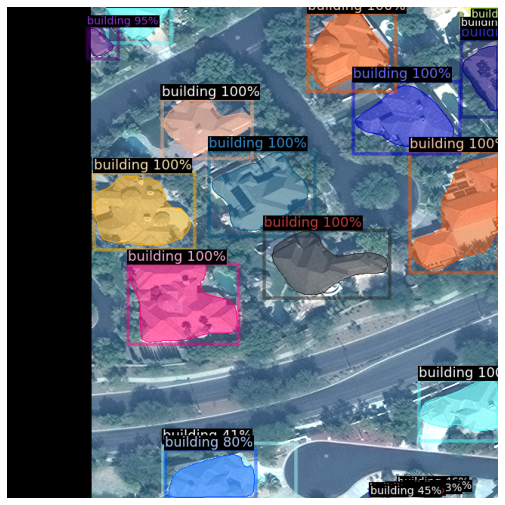

{'boxes': tensor([[1.6474e+02, 9.0704e+01, 2.4156e+02, 1.4975e+02],
        [3.4877e+02, 2.4251e+02, 3.9533e+02, 3.1180e+02],
        [2.7531e+02, 4.0414e+02, 3.2765e+02, 4.7610e+02],
        [2.3373e+02, 2.4949e+02, 2.8244e+02, 3.1267e+02],
        [1.0011e+01, 2.5484e+02, 5.8119e+01, 3.1671e+02],
        [2.8421e+02, 5.8057e+02, 3.6031e+02, 6.2105e+02],
        [1.3413e+02, 5.0900e+02, 1.7891e+02, 5.7378e+02],
        [5.1019e+02, 1.3425e+02, 5.5749e+02, 1.9489e+02],
        [7.7265e+01, 5.0357e+02, 1.2333e+02, 5.7617e+02],
        [6.5487e+01, 2.5378e+02, 1.1418e+02, 3.0883e+02],
        [1.0876e+02, 1.3833e+02, 1.7391e+02, 1.9641e+02],
        [3.8264e-01, 1.3983e+02, 4.4312e+01, 2.0280e+02],
        [3.9956e+02, 1.3968e+02, 4.4523e+02, 2.0978e+02],
        [2.8283e+02, 5.4252e+02, 3.7108e+02, 5.7607e+02],
        [4.0464e+02, 2.4647e+02, 4.5146e+02, 3.0891e+02],
        [3.3485e+02, 4.0025e+02, 3.8142e+02, 4.7188e+02],
        [4.5429e+02, 1.3156e+02, 5.0147e+02, 1.9195e+02],
    

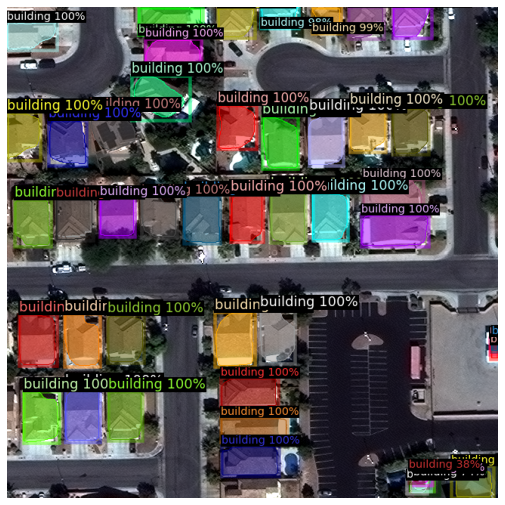

{'boxes': tensor([[1.2472e+01, 1.8429e+02, 1.6763e+02, 2.7660e+02],
        [1.6105e+02, 2.1585e+02, 3.2213e+02, 3.0683e+02],
        [3.1241e+02, 2.5833e+02, 4.7344e+02, 3.5240e+02],
        [4.6201e+02, 3.0440e+02, 6.2312e+02, 4.0111e+02],
        [3.4578e+02, 4.2454e+02, 4.1879e+02, 4.9354e+02],
        [4.2834e+02, 4.4992e+02, 5.1233e+02, 5.1677e+02],
        [1.6640e+02, 3.7898e+02, 2.5121e+02, 4.4859e+02],
        [5.1547e+02, 4.7930e+02, 5.8664e+02, 5.3993e+02],
        [2.5420e+02, 4.0123e+02, 3.3932e+02, 4.7356e+02],
        [7.8707e+01, 4.5852e+02, 1.6293e+02, 5.1692e+02],
        [2.2877e+02, 5.8159e+02, 3.2718e+02, 6.5000e+02],
        [2.9992e+02, 1.0553e+01, 4.5309e+02, 9.8249e+01],
        [4.3203e+02, 5.9887e+02, 5.2072e+02, 6.4891e+02],
        [4.5185e+02, 5.4338e+01, 6.0359e+02, 1.4424e+02],
        [7.3292e+01, 5.3258e+02, 1.4691e+02, 5.9225e+02],
        [3.5410e+02, 5.6335e+02, 4.2669e+02, 6.2706e+02],
        [5.9254e+02, 5.0698e+02, 6.5000e+02, 5.7513e+02],
    

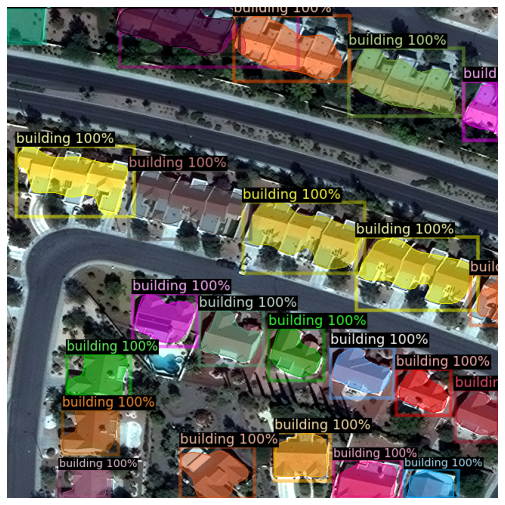

{'boxes': tensor([[8.9469e+01, 4.0458e+02, 1.8532e+02, 4.9364e+02],
        [1.1299e+02, 2.0375e+01, 2.2103e+02, 1.1334e+02],
        [0.0000e+00, 1.6618e+02, 6.1336e+01, 2.4107e+02],
        [2.1794e+02, 2.7072e+02, 3.1810e+02, 3.5917e+02],
        [3.9556e+02, 4.6201e+02, 4.7530e+02, 5.2623e+02],
        [4.8443e+01, 7.1606e-02, 1.3622e+02, 5.5901e+01],
        [4.6499e+02, 3.8259e+02, 5.3683e+02, 4.4275e+02],
        [1.4987e+02, 3.2398e+02, 2.4497e+02, 4.0708e+02],
        [2.1193e+02, 8.6506e+01, 2.9516e+02, 1.6358e+02],
        [3.6858e+00, 4.6128e+02, 1.0960e+02, 5.4014e+02],
        [3.0826e+02, 1.3492e+02, 3.8675e+02, 1.9387e+02],
        [3.6033e+02, 4.9343e+02, 4.4521e+02, 5.5382e+02],
        [0.0000e+00, 2.5992e+02, 7.0851e+01, 3.2143e+02],
        [2.8911e+02, 2.1870e+02, 3.8245e+02, 2.8063e+02],
        [5.9560e+02, 3.6620e+02, 6.4786e+02, 4.2463e+02],
        [4.2601e+02, 4.2908e+02, 5.0153e+02, 4.9168e+02],
        [3.2503e+02, 5.2029e+02, 4.1243e+02, 5.7997e+02],
    

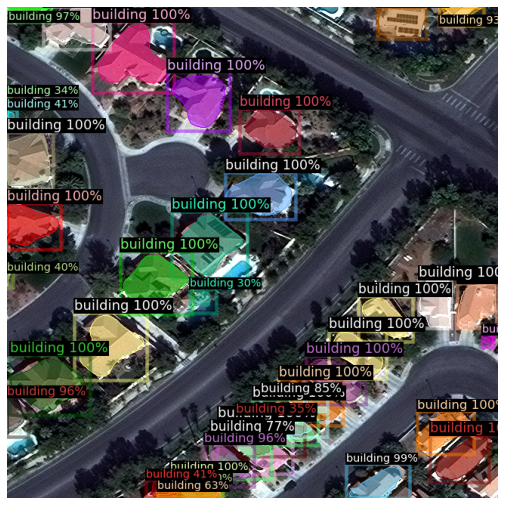

{'boxes': tensor([[  0.0000, 178.2541, 103.5971, 281.5046],
        [  6.3541, 278.1602, 117.0534, 378.8885],
        [534.7198, 142.5686, 650.0000, 246.7824],
        [347.5113, 299.5578, 470.9632, 378.1155],
        [159.2423, 122.5128, 266.8765, 202.6174],
        [ 33.3325, 378.4816, 151.2181, 477.6601],
        [ 98.8730, 572.4849, 236.2747, 650.0000],
        [398.6680, 126.9202, 531.4083, 218.2265],
        [285.6295, 121.5135, 394.0278, 201.4419],
        [ 76.8559, 476.3338, 188.5556, 573.2570],
        [  4.8097, 106.1688, 145.5595, 172.3809],
        [498.5236, 332.6119, 650.0000, 523.1506],
        [454.2248, 498.4027, 484.2088, 529.4764],
        [206.1803, 282.8808, 331.5837, 449.7946],
        [292.8639, 528.8389, 480.0326, 650.0000],
        [620.3907, 624.7081, 650.0000, 650.0000],
        [315.4511, 429.5284, 352.5540, 458.2150],
        [379.8813, 387.3566, 408.0904, 417.2746],
        [494.1373, 565.7357, 524.2318, 585.0456]], device='cuda:0'), 'labels': tensor([1, 

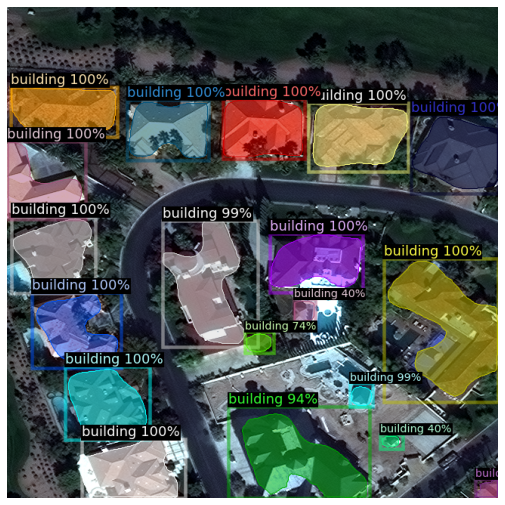

{'boxes': tensor([[232.9882, 494.8917, 398.1328, 635.6625],
        [345.5533, 344.5003, 519.0725, 443.7895],
        [ 19.1385, 572.6498, 208.1564, 648.7734],
        [495.7457, 253.9078, 637.8226, 365.7907],
        [387.1422, 462.9169, 537.3348, 566.4662],
        [498.4262, 571.8525, 627.7821, 646.7500],
        [607.2435, 200.7621, 650.0000, 260.8324]], device='cuda:0'), 'labels': tensor([1, 1, 1, 1, 1, 1, 1], device='cuda:0'), 'scores': tensor([0.9998, 0.9998, 0.9996, 0.9992, 0.9989, 0.9987, 0.9962],
       device='cuda:0'), 'masks': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 

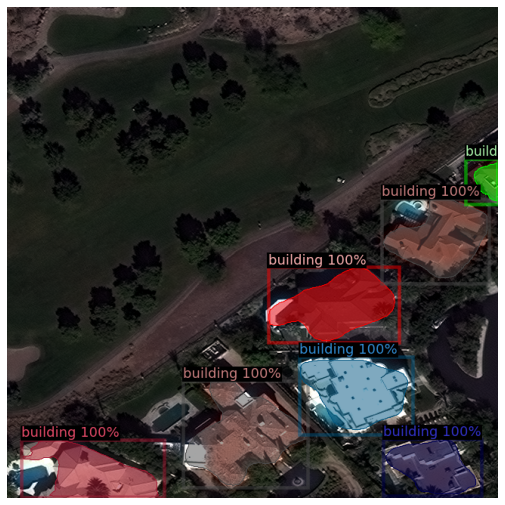

In [4]:
iters = 6

for i, (image, target) in enumerate(d):
    image = image.to(device)[0]
    #target = {k: v.to(device) for k, v in target.items()}
    
    with torch.no_grad():
        result = model(image)
    print(result)
    pmr.show(image, result, ds.classes, "./images/output{}.jpg".format(i))

    if i >= iters - 1:
        break